In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Read the tsv file and return a pandas dataframe
def read_tsv_file(file_path: str)-> pd.DataFrame:
    data_columns = ['Date', 'Actual', 'Predict', 'ProbAboveZero', 'Std']
    df = pd.read_csv(file_path, sep='\t')
    df = df[data_columns]
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [14]:
# tsv ファイルの読み込み
df_RBF = read_tsv_file('./rst_20days_RBF.tsv')

df_Mattern25 = read_tsv_file('./rst_20days_Mattern25.tsv')

df_5dayS_RBF = read_tsv_file('./rst_5days_RBF.tsv')

In [15]:
def gen_table_probrange_actcount(df:pd.DataFrame)->pd.DataFrame:
    years = range(2018,2024)
    AboveZero = []
    BelowZero = []
    ProbRange = []
    Year = []
    for yr in years:
        df_yr = df[df['Date'].dt.year == yr]
        for i in range(0, 10):
            Year.append(yr) 
            ProbRange.append(f'{i*10}%以上{(i+1)*10}%未満')
            df_tmp = df_yr[(df_yr['ProbAboveZero'] >= i*0.1) & (df_yr['ProbAboveZero'] < (i+1)*0.1)]
            AboveZero.append(len(df_tmp[df_tmp['Actual'] >=0]))
            BelowZero.append(len(df_tmp[df_tmp['Actual'] < 0]))

    data = {'Year':Year, 'ProbRange':ProbRange, 'AboveZero':AboveZero, 'BelowZero':BelowZero}

    return pd.DataFrame(data)

In [16]:
countDF = gen_table_probrange_actcount(df_RBF)
# DataFrameを保存する
countDF.to_csv('count_20days_RBF.csv')

countDF = gen_table_probrange_actcount(df_Mattern25)
# DataFrameを保存する
countDF.to_csv('count_20days_Mattern25.csv')

countDF = gen_table_probrange_actcount(df_5dayS_RBF)
# DataFrameを保存する
countDF.to_csv('count_5days_RBF.csv')

In [17]:
def draw_graph_act_vs_pred(df:pd.DataFrame) -> None:
    fig, ax = plt.subplots(3,2, figsize=(10,15))

    years = range(2018,2024) # 2018年から2023年までのデータを表示

    for i, year in enumerate(years):
        df_year = df[df['Date'].dt.year == year]
        # actual vs predict の散布図を描く
        ax[i//2, i%2].scatter(df_year['Actual'], df_year['Predict'])
        # ４５度の直線を追加する
        ax[i//2, i%2].plot([df_year['Actual'].min(), df_year['Actual'].max()], [df_year['Actual'].min(), df_year['Actual'].max()], color='red')
        # グラフのタイトルと軸ラベルを設定
        ax[i//2, i%2].set_title(f'Scatter plot of Actual and Prediction in {year}')
        ax[i//2, i%2].set_xlabel('Actual')
        ax[i//2, i%2].set_ylabel('Prediction')
        ax[i//2, i%2].grid(True)

    # グラフを表示
    plt.tight_layout()
    plt.show()

# グラフを描く
def draw_graph_prob_vs_act(df:pd.DataFrame) -> None:
    
    fig, ax = plt.subplots(3,2, figsize=(10,15))

    years = range(2018,2024) # 2018年から2023年までのデータを表示

    for i, year in enumerate(years):
        df_year = df[df['Date'].dt.year == year]
        # probAboveZero vs actual の散布図を描く
        ax[i//2, i%2].scatter(df_year['ProbAboveZero'], df_year['Actual'])
        ax[i//2, i%2].scatter(df_year['ProbAboveZero'], df_year['Predict'])
        
        # 水平線を描く
        ax[i//2, i%2].plot([0, 1], [0, 0], color='red')

        # グラフのタイトルと軸ラベルを設定
        ax[i//2, i%2].set_title(f'Scatter plot of ProbAboveZero and Actual in {year}')
        ax[i//2, i%2].set_xlabel('ProbAboveZero')
        ax[i//2, i%2].set_ylabel('Actual')
        ax[i//2, i%2].grid(True)

    # グラフを表示
    plt.tight_layout()
    plt.show()

    

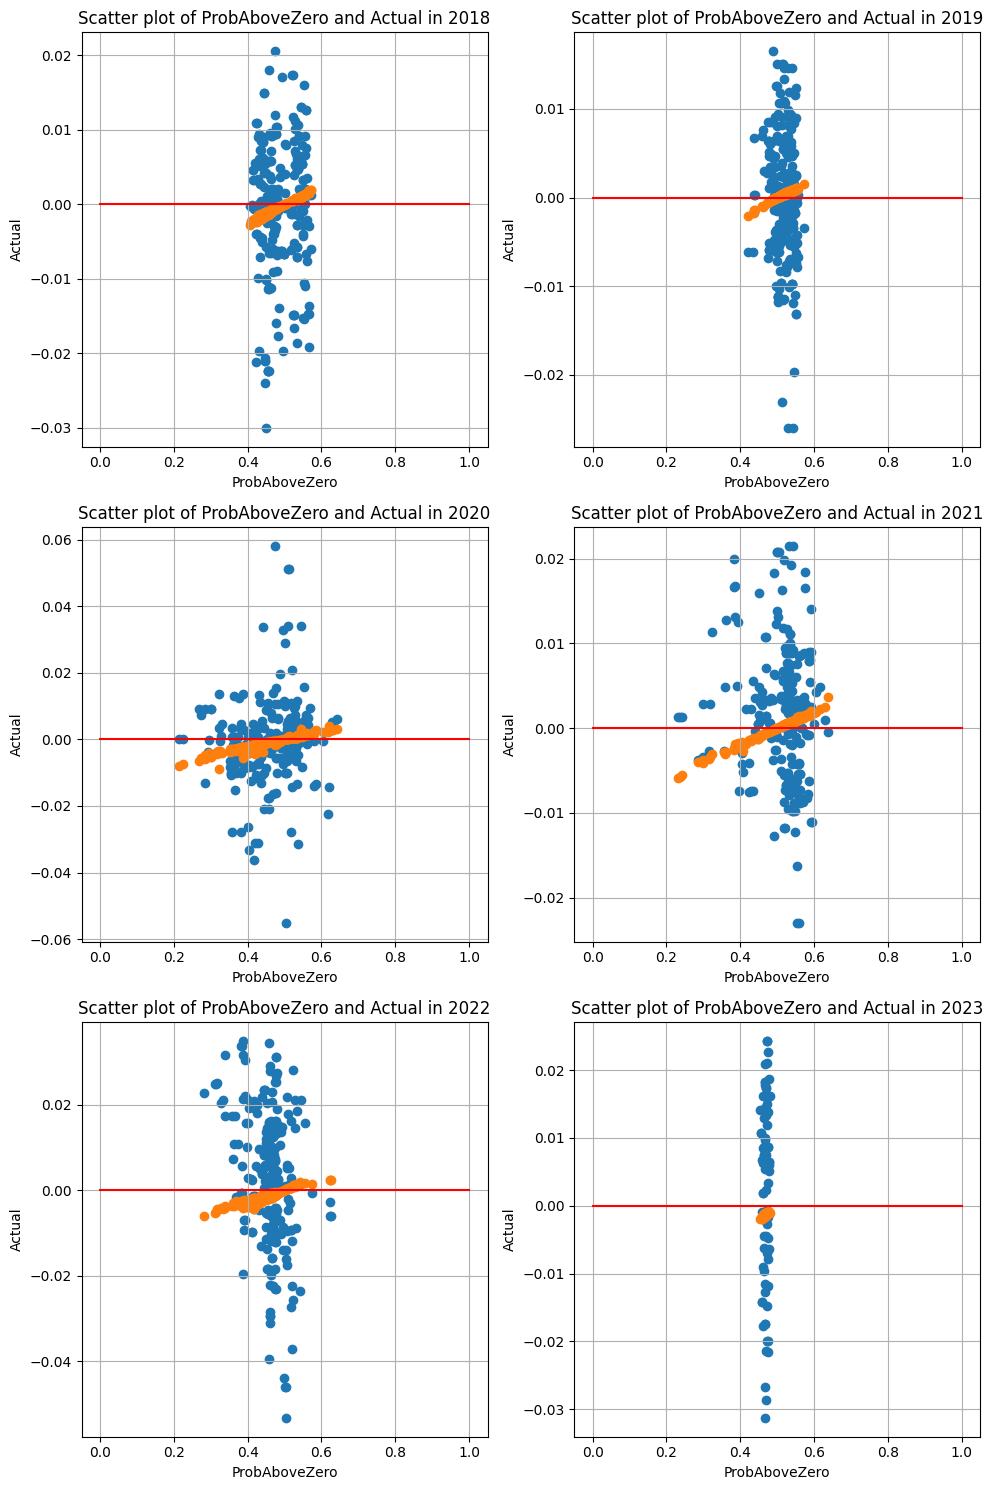

In [18]:
draw_graph_prob_vs_act(df_5dayS_RBF)

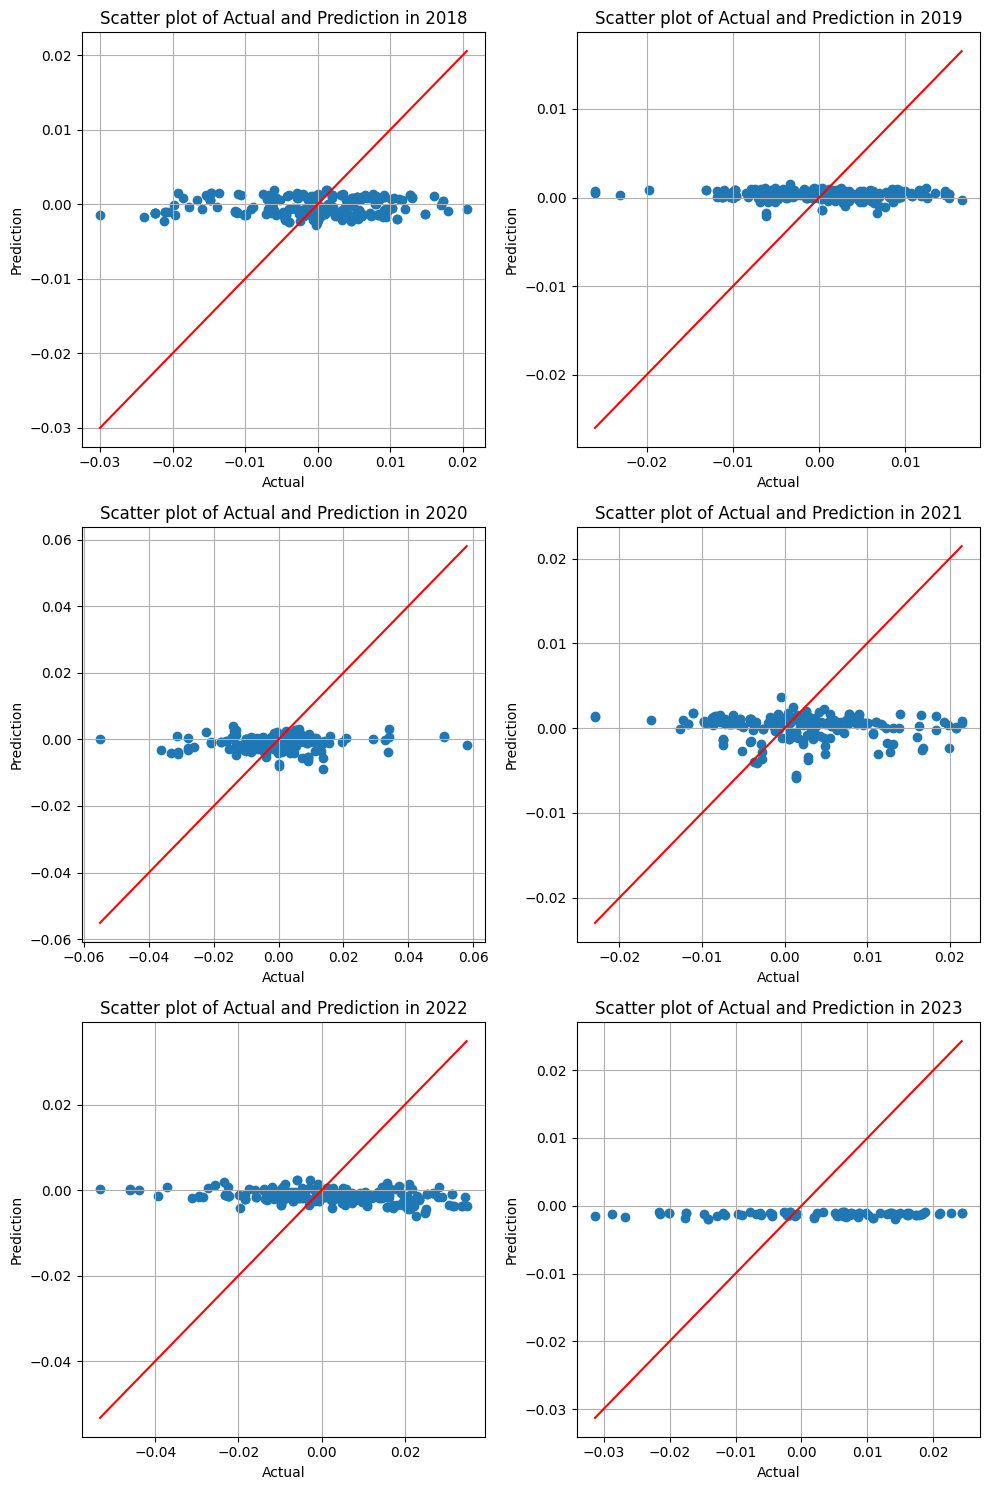

In [19]:
draw_graph_act_vs_pred(df_5dayS_RBF)

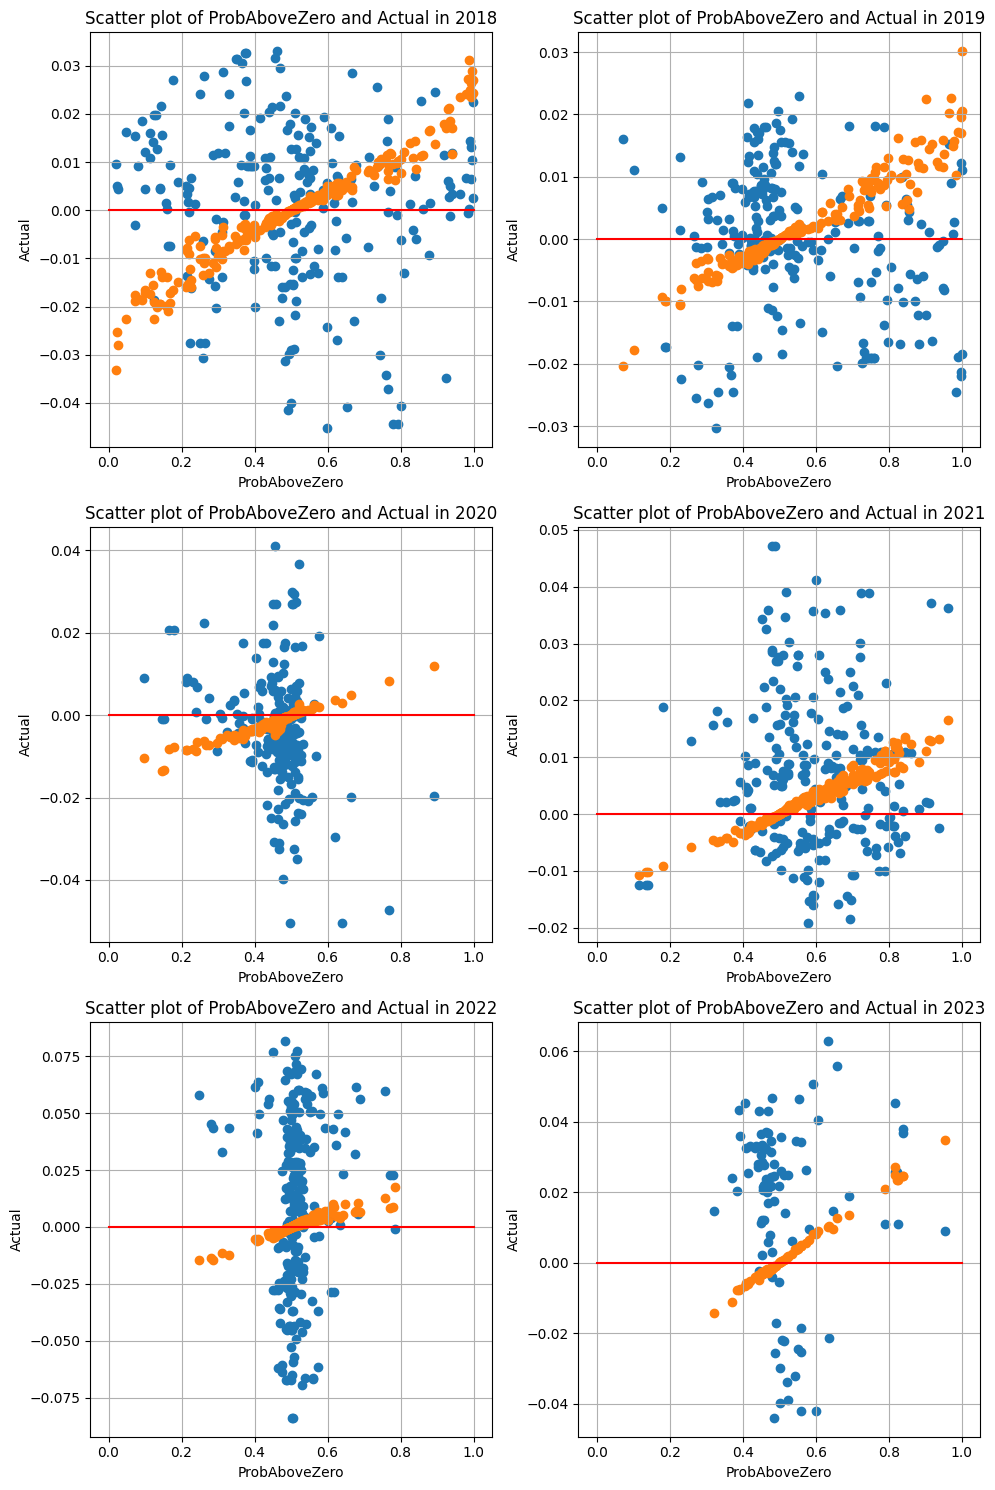

In [26]:
draw_graph_prob_vs_act(df_RBF)

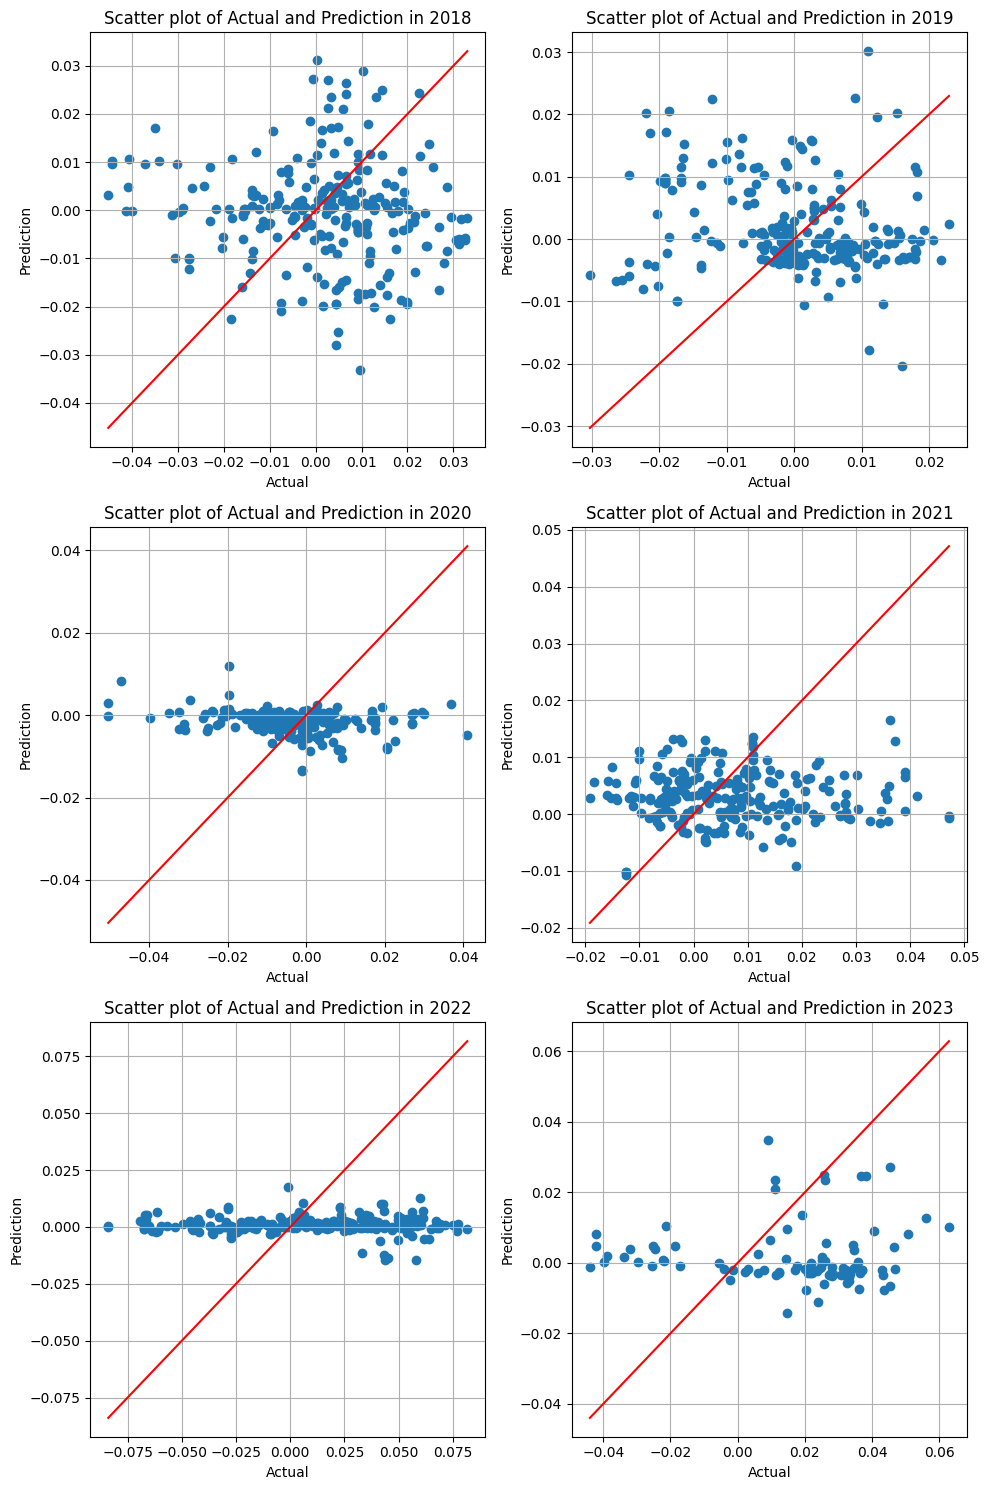

In [18]:
draw_graph_act_vs_pred(df_RBF)

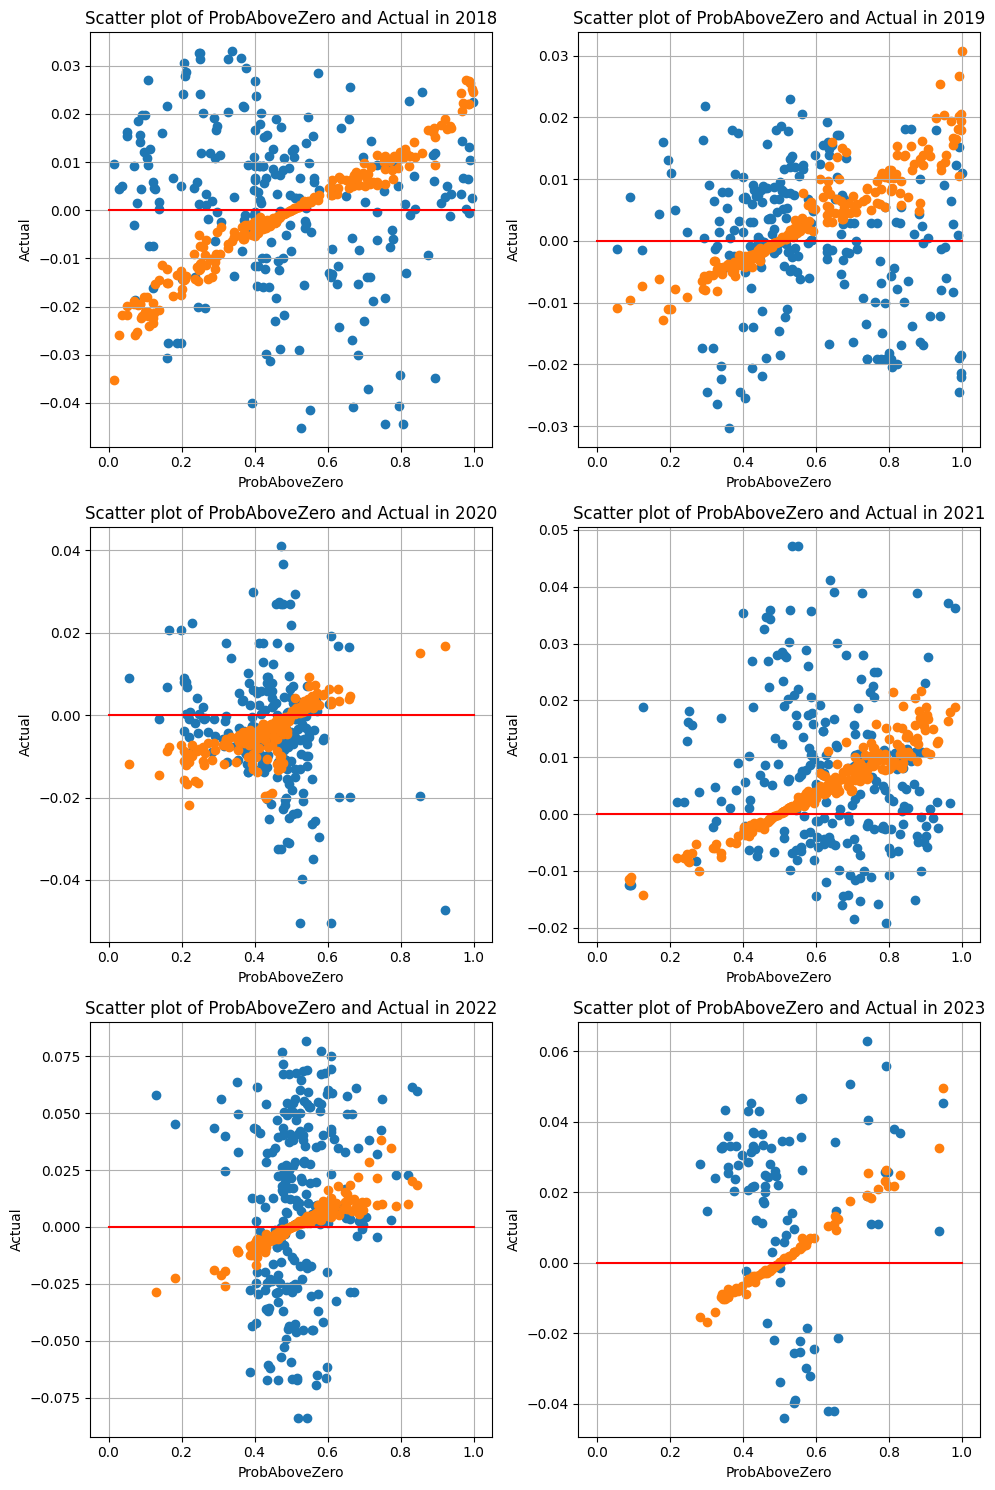

In [27]:
draw_graph_prob_vs_act(df_Mattern25)

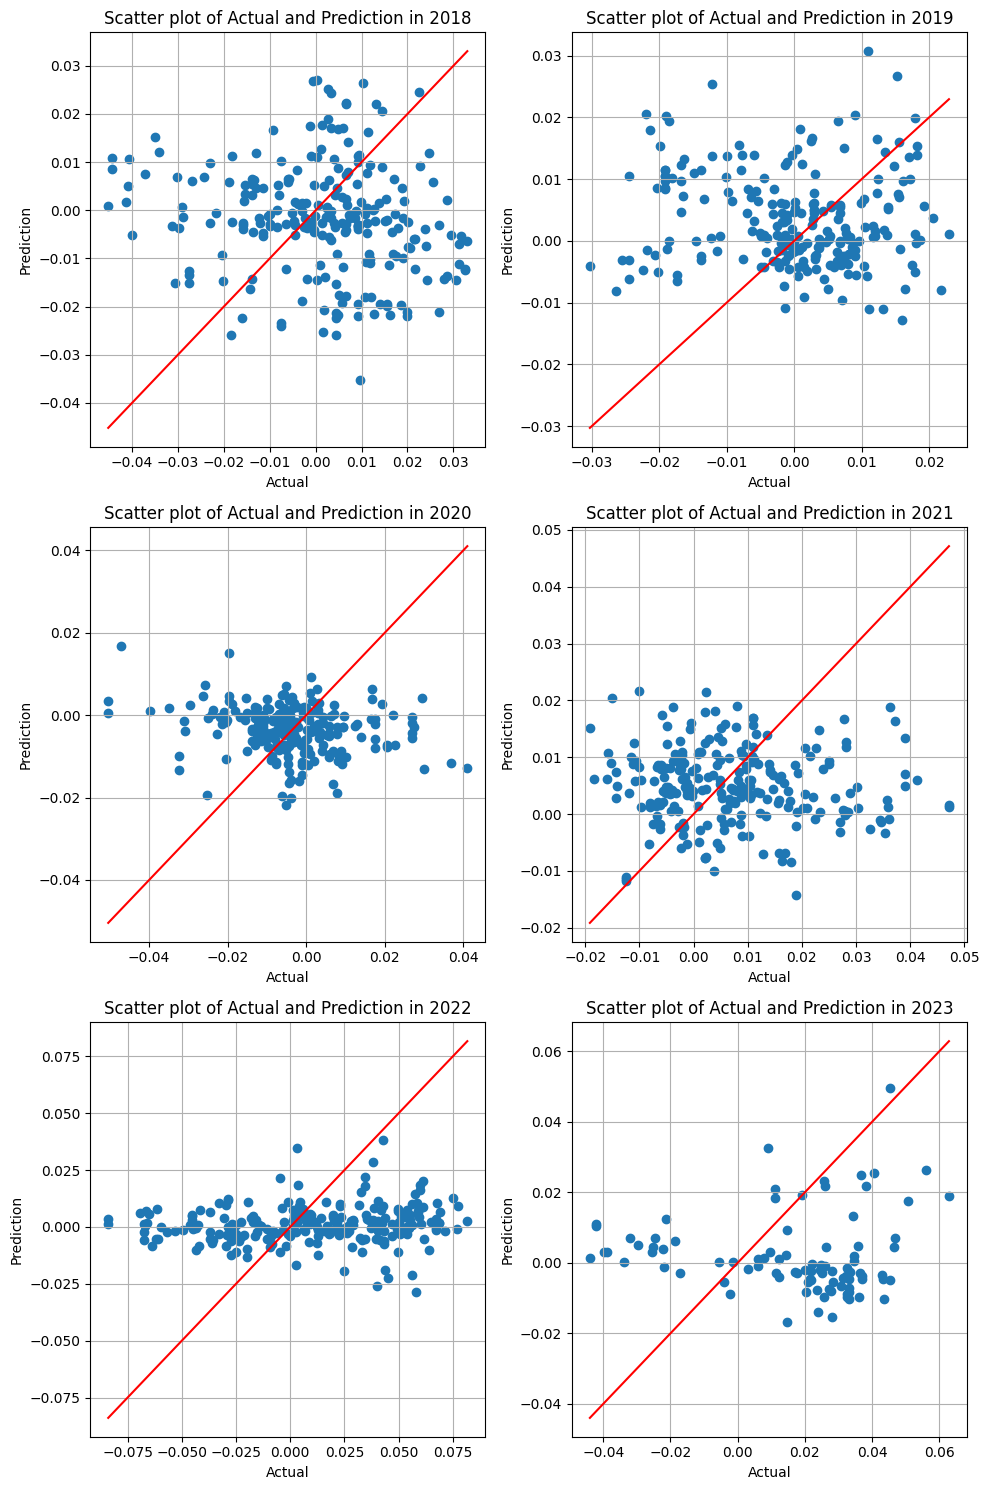

In [19]:
draw_graph_act_vs_pred(df_Mattern25)